In [ ]:
from cProfile import label
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install xgboost

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [3]:
# load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
N_observations, N_features = X.shape
print("Number of observations:", N_observations)
print("Number of features:", N_features)

Number of observations: 20640
Number of features: 8


In [5]:
# model initialization
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [8]:
# fit the model and measure training time
# Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

In [9]:
print("Random Forest training time", rf_train_time)
print("XGBoost training time", xgb_train_time)

Random Forest training time 12.908785104751587
XGBoost training time 0.1331171989440918


In [10]:
# prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# prediction time for XGBoost
start_time_xgb = time.time()
y_pred_xbg = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

In [11]:
print("Random Forest prediction time:", rf_pred_time)
print("XGBoost prediction time:", xgb_pred_time)

Random Forest prediction time: 0.1511554718017578
XGBoost prediction time: 0.004076957702636719


In [13]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xbg)

r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xbg)

In [14]:
print(f"Random Forest: MSE = {mse_rf:.4f}, R2 = {r2_rf:.4f}")
print(f"XGBoost: MSE = {mse_xgb:.4f}, R2 = {r2_xgb:.4f}")

Random Forest: MSE = 0.2556, R2 = 0.8050
XGBoost: MSE = 0.2226, R2 = 0.8301


In [15]:
std_y = np.std(y_test)

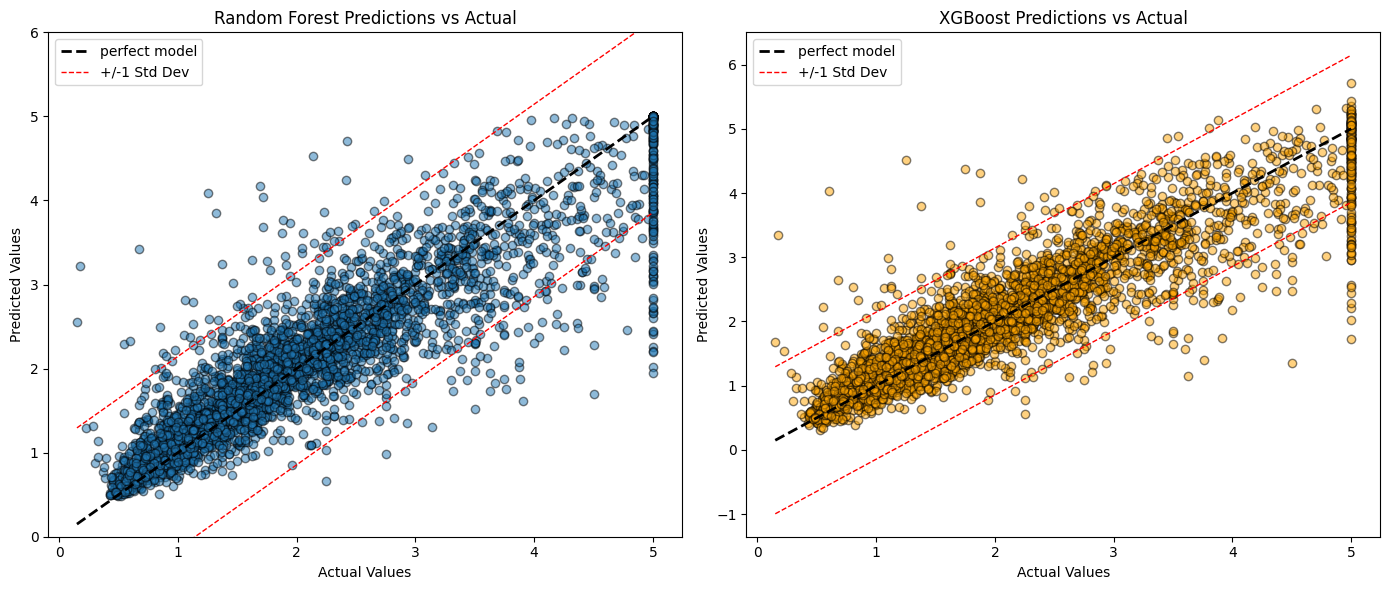

In [40]:
# visualize the results
plt.figure(figsize=(14, 6))

# random forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, ec="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1,)
plt.ylim(0, 6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xbg, alpha=0.5, color='orange', ec="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1,)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.tight_layout()
plt.show()